# Stack Overflow

## Introduction 

In the second part of this assignment, we will create and analyze time series of creation dates of Stack Overflow questions. This assignment is to be completed **INDIVIDUALLY** and it is due on **October 7 at 7pm**.

Let's create some time series from the data. You may choose to analyze either users or tags. To analyze users, take the top 100 users with the most question posts. For each user, your time series will be the number of questions posted by that user at some frequency. To analyze tags, take the top 100 most popular question tags. For each tag, your time series will be the number of questions with that tag at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze tags and sample during different hours of the day, your hypothesis could be that languages (i.e. Javascript) that are used more in industry will have more questions posted during work hours, whereas languages (i.e. Python) that are taught in academia will have more questions posted after midnight when students are scrambling to finish their homework.

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data, what timeseries you created, what method you chose and why. **(30 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

In [272]:
import xml.etree.ElementTree as ET
import csv
import pandas as pd

# Chose to analyze users based on different hours of the day

users = []

# iterate through all users
for event, elem in ET.iterparse('stackoverflow-posts-2015.xml'):
    if ('PostTypeId' not in elem.attrib):
            continue
    if elem.attrib['PostTypeId'] == '1':
        if ('OwnerUserId' not in elem.attrib):
            continue
        userId = elem.attrib['OwnerUserId']
        datetime = elem.attrib['CreationDate']
        users.append([datetime, 1, userId])
    elem.clear()
    
cols = ['Datetime', 'Count', 'UserId']
# group same UserId together to get the top 100 users
grouped = pd.DataFrame(users, columns = cols).set_index('Datetime').groupby('UserId')
top = grouped.size().sort_values(ascending=False)[:100].index

In [274]:
from scipy.spatial import distance
import numpy as np

cdnt = np.empty(shape=(100,24))

# get the total number of posts at each hour of each top users during 2015
for i in range(100):
    tmp = grouped.get_group(top[i]).drop('UserId',axis=1)
    tmp.index = pd.to_datetime(tmp.index)
    tmp = tmp.append(pd.DataFrame(0, columns=['Count'], index=pd.date_range('1/1/2015', periods=24, freq='H')))
    tmp = tmp.groupby([tmp.index.hour])
    cdnt[i,:] = np.transpose(tmp.sum().values)

# calculate euclidean distance between top users
dist = distance.pdist(cdnt, 'euclidean')
# get the userId of the most different and similar users
D = distance.squareform(dist)
I = np.argmax(D)
I_max = np.unravel_index(I, D.shape)
D = np.ma.masked_equal(D, 0.0, copy=False)
I = np.argmin(D)
I_min = np.unravel_index(I, D.shape)
ids = [I_max[0], I_max[1], I_min[0], I_min[1]]
users = []
# get the dataframe of each selected users
for it in ids:
    user = grouped.get_group(top[it]).drop('UserId',axis=1)
    user.index = pd.to_datetime(user.index)
    user = user.append(pd.DataFrame(0, columns=['Count'], index=pd.date_range('1/1/2015', periods=24, freq='H')))
    user = user.groupby([user.index.hour])
    user = user.sum()
    users.append(user)

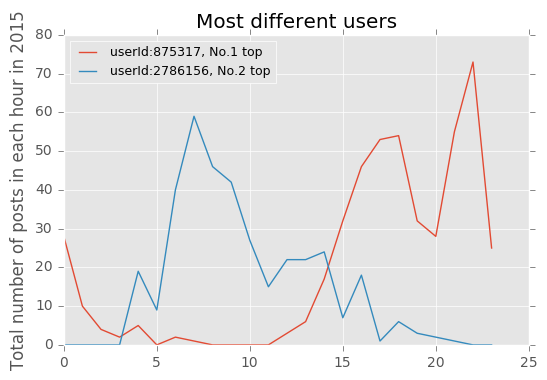

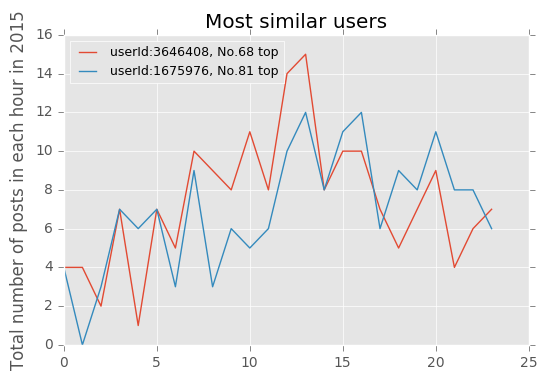

In [275]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# plot the most different and similar users
user_1, = plt.plot(users[0], label='userId:'+top[ids[0]]+', No.'+str(ids[0]+1)+' top')
user_2, = plt.plot(users[1], label='userId:'+top[ids[1]]+', No.'+str(ids[1]+1)+' top')
plt.legend(handles=[user_1, user_2], loc='upper left', fontsize='9')
plt.ylabel('Total number of posts in each hour in 2015')
plt.title('Most different users')
plt.show()
plt.figure()
user_3, = plt.plot(users[2], label='userId:'+top[ids[2]]+', No.'+str(ids[2]+1)+' top')
user_4, = plt.plot(users[3], label='userId:'+top[ids[3]]+', No.'+str(ids[3]+1)+' top')
plt.legend(handles=[user_3, user_4], loc='upper left', fontsize='9')
plt.ylabel('Total number of posts in each hour in 2015')
plt.title('Most similar users')
plt.show()
plt.close()

The two plots above show four curves, displaying the most different and similar users based on the total number of posts during each hour over the year of 2015. The dissimilarity function is calculated as the euclidean distance among each pair of the top 100 users. 
Based on the total number of posts, we may predict that users working in idustry may post more questions during work hours 8am-5pm, where as users being students may raise more questions late in night for assignments.

Choose a different distance/similarity metric and repeat the same time series analysis. Compare the two different metrics you used. **(10 pts)**

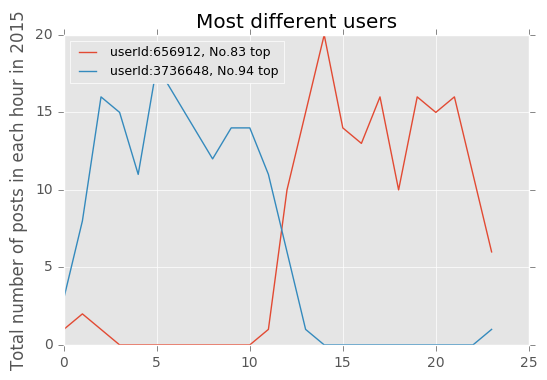

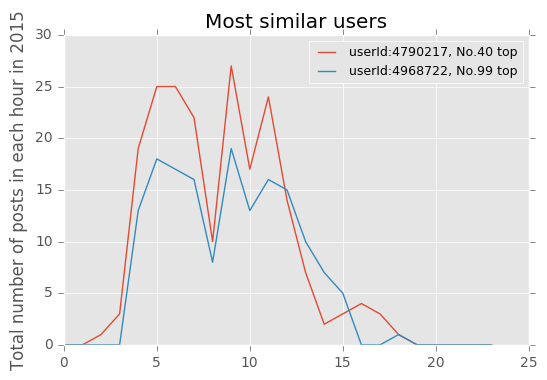

In [282]:
dist1 = distance.pdist(cdnt, 'correlation')
D1 = distance.squareform(dist1)
I1 = np.argmax(D1)
I1_max = np.unravel_index(I1, D1.shape)
D1 = np.ma.masked_equal(D1, 0.0, copy=False)
I1 = np.argmin(D1)
I1_min = np.unravel_index(I1, D1.shape)
ids1 = [I1_max[0], I1_max[1], I1_min[0], I1_min[1]]
users1 = []

for it in ids1:
    user = grouped.get_group(top[it]).drop('UserId',axis=1)
    user.index = pd.to_datetime(user.index)
    user = user.append(pd.DataFrame(0, columns=['Count'], index=pd.date_range('1/1/2015', periods=24, freq='H')))
    user = user.groupby([user.index.hour])
    user = user.sum()
    users1.append(user)
    
user_11, = plt.plot(users1[0], label='userId:'+top[ids1[0]]+', No.'+str(ids1[0]+1)+' top')
user_21, = plt.plot(users1[1], label='userId:'+top[ids1[1]]+', No.'+str(ids1[1]+1)+' top')
plt.legend(handles=[user_11, user_21], loc='upper left', fontsize='9')
plt.ylabel('Total number of posts in each hour in 2015')
plt.title('Most different users')
plt.show()
plt.figure()
user_31, = plt.plot(users1[2], label='userId:'+top[ids1[2]]+', No.'+str(ids1[2]+1)+' top')
user_41, = plt.plot(users1[3], label='userId:'+top[ids1[3]]+', No.'+str(ids1[3]+1)+' top')
plt.legend(handles=[user_31, user_41], loc='upper right', fontsize='9')
plt.ylabel('Total number of posts in each hour in 2015')
plt.title('Most similar users')
plt.show()
plt.close()

Redo the calculation with correlation distance and generate different results. Correlation measures the increasing and decreasing trends in data. The difference now is the correlation between users. If the number of posts reflects the level of activity of that user, we can say that the most different users live a very different lifestyle, whereas the most similar users live a similar one. 